In [5]:
import pandas as pd
import numpy as np

## Reading the Data

In [2]:
def read_data():
    claims_datas = [f"claims_{i}" for i in range(1, 6)]
    claims = pd.read_csv("Data/claims1.csv")
    for i in range(2, 6):
        claims = claims.append(pd.read_csv(f"Data/claims{i}.csv"))
    return claims

In [3]:
claims = read_data()

## Log Transformation

In [8]:
claims["log(reimb2010+1)"] = np.array(claims["reimb2010"]) + 1
claims["log(reimb2010+1)"] = np.log10(claims["log(reimb2010+1)"])

In [ ]:
claims["log(reimb2010+1)"] = np.array(claims["reimb2010"]) + 1
claims["log(reimb2010+1)"] = np.log10(claims["log(reimb2010+1)"])

In [12]:
claims["log(reimb2009+1)"] = np.array(claims["reimb2009"]) + 1
claims["log(reimb2009+1)"] = np.log10(claims["log(reimb2009+1)"])

In [13]:
claims["log(reimb2008+1)"] = np.array(claims["reimb2008"]) + 1
claims["log(reimb2008+1)"] = np.log10(claims["log(reimb2008+1)"])

<AxesSubplot:>

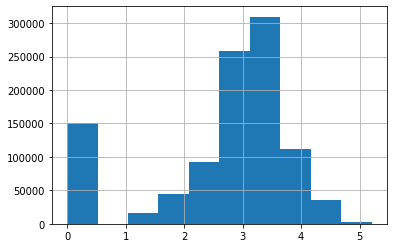

In [11]:
claims["log(reimb2010+1)"].hist()

<AxesSubplot:>

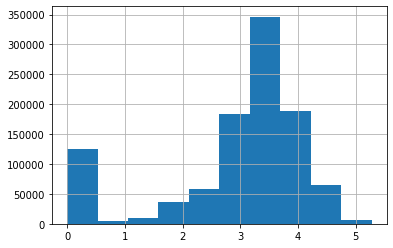

In [14]:
claims["log(reimb2009+1)"].hist()

<AxesSubplot:>

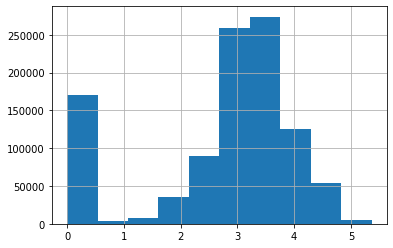

In [16]:
claims["log(reimb2008+1)"].hist()

In [27]:
import itertools

In [28]:
def create_var_combinations(data_columns, n):
    combinations = itertools.combinations(data_columns, n)
    return list(combinations)

In [29]:
lst = create_var_combinations(claims.columns, 3)

4960